## Objetivo
---
#### Criar um modelo preditivo e comprovar sua eficácia com métricas estatísticas.


## Dicionário dos dados 
* Idade: idade do beneficiário principal.
* Gênero: gênero do contratante de seguros.
* IMC: índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura.
* Filhos: número de filhos cobertos por seguro saúde / Número de dependentes.
* Fumante: se a pessoa fuma (sim ou não).
* Região: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste ou noroeste.
* Encargos: custos médicos individuais cobrados pelo seguro de saúde.


#

In [1]:
# 01 ===[ Importando as bibliotecas necessárias ]====================
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [2]:
# 02 ===[ Subindo os dados para um dataframe ]==========================================
df_pacientes = pd.read_csv('./insurance.csv')

In [3]:
# 03 ===[ Conhecendo os Dados ]========================================
# 03.1 - As cinco primeiras linhas:
df_pacientes.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 03.2 - As cinco últimas linhas:
df_pacientes.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Alvo: 
```
  Predizer o custo hopitalar.
  Mais especificamente o campo charges.
```

#

In [5]:
# 03.3 - Dimensões:
df_pacientes.shape

(1338, 7)

#
## 7 dimensões com 1338 registros.

#

In [6]:
# 03.4 - Metadados:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Fatos:

* Não existem dados nulos.
* 3 são do tipo object: sex, smoker e region.
* 4 são numéricos.
* Base pequena: 73.3KB.

#

In [7]:
# 03.5 - Verificando valores únicos por coluna:
df_pacientes.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Categóricas Binárias:
```
  Como a prática mais moderna e segura para o pré-processamento 
do modelo é usar OneHotEncoder (ou pd.get_dummies) para todas as 
variáveis categóricas, incluindo as binárias.
  Mesmo tendo somente 2 tipos de valores:
```
* sex
* somker

```
  Será utiliado OnHotEncoder.
```

#

In [8]:
# 03.6 - Verificando os tipos existentes em "sex":
set(df_pacientes['sex'])

{'female', 'male'}

In [9]:
# 03.7 - Verificando os tipos existentes em "smoker":
set(df_pacientes['smoker'])

{'no', 'yes'}

In [10]:
# 03.8 - Verificando os tipos existentes em "region":
set(df_pacientes['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [11]:
# 03.9 - Estatísticas descritivas:
df_pacientes.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 

```
  Em média temos uma idade de 39 anos, com BMI (IMC) 30, 01 filho e custo hospitalar de 13270.
```

#

In [12]:
# 03.10 - Verificando valores duplicados:
df_pacientes.duplicated().sum()

np.int64(1)

#

 
```
  Existem valores duplicados.
```

#

In [13]:
# 03.11 - Mostra todas as ocorrências das linhas que têm duplicatas (incluindo a primeira)
df_pacientes[df_pacientes.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
# 03.12 - Excluindo os registros duplicaso.
df_pacientes.drop_duplicates(inplace=True)

In [15]:
# 03.13 - Verificando valores duplicados novamente:
df_pacientes.duplicated().sum()

np.int64(0)

#

 
```
  Agora sim, não existem mais valores duplicados.
```

#

<Axes: >

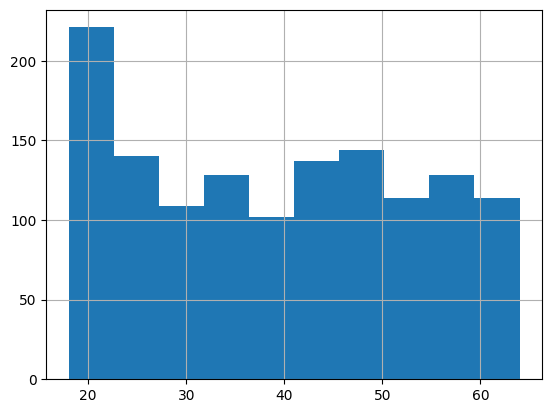

In [16]:
# 04 ===[ Análise de Cada Feature Individualmente ]==================================
# 04.1 - Histograma da idade:
df_pacientes['age'].hist()

Text(0, 0.5, 'Densidade')

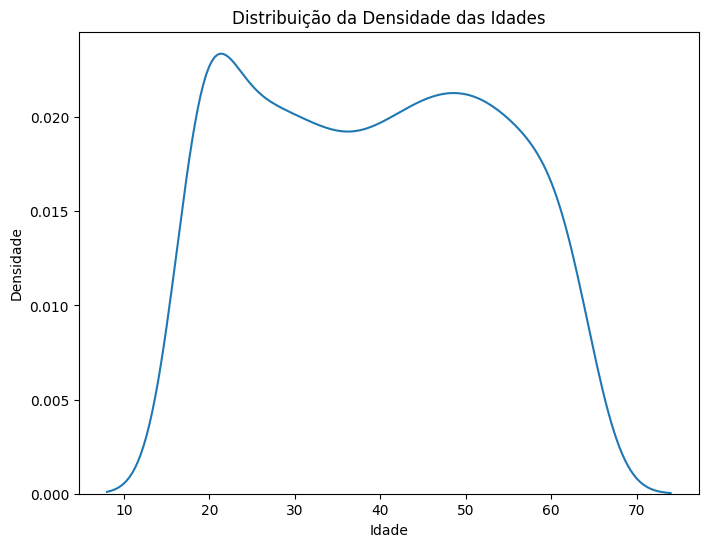

In [17]:
# 04.2 - Distribuição da densidade no campo "age":
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_pacientes, x='age')
plt.title('Distribuição da Densidade das Idades')
plt.xlabel('Idade')
plt.ylabel('Densidade')

Text(0, 0.5, 'Idade')

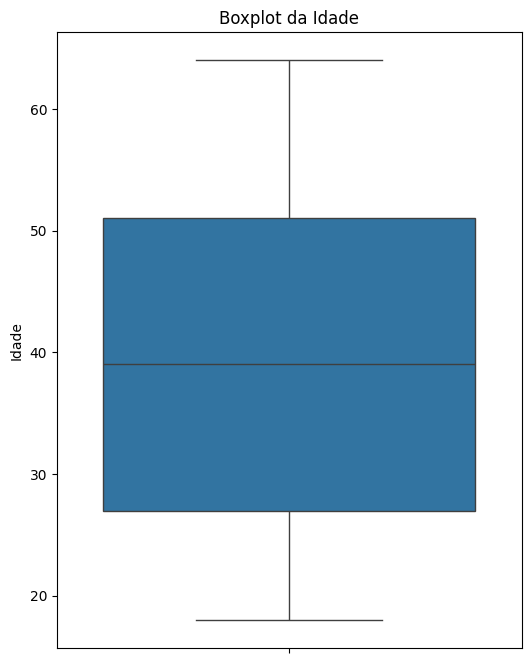

In [18]:
# 04.3 - Boxplot do campo "age":
plt.figure(figsize=(6, 8))
sns.boxplot(y=df_pacientes['age'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')

## Sobre as idades:
```
  A maioria tem 20 anos.
  As demais idades ficam em uma quantidade registros de 125 em média.
  O histograma contém um gráfico assíncrono, não normatizado.
  Essa features numérica será padronizada com StandardScaler, para não interferir no
treinamento da regressão linear.
  Não existem outliers.
```

#

([0, 1], [Text(0, 0, 'male'), Text(1, 0, 'female')])

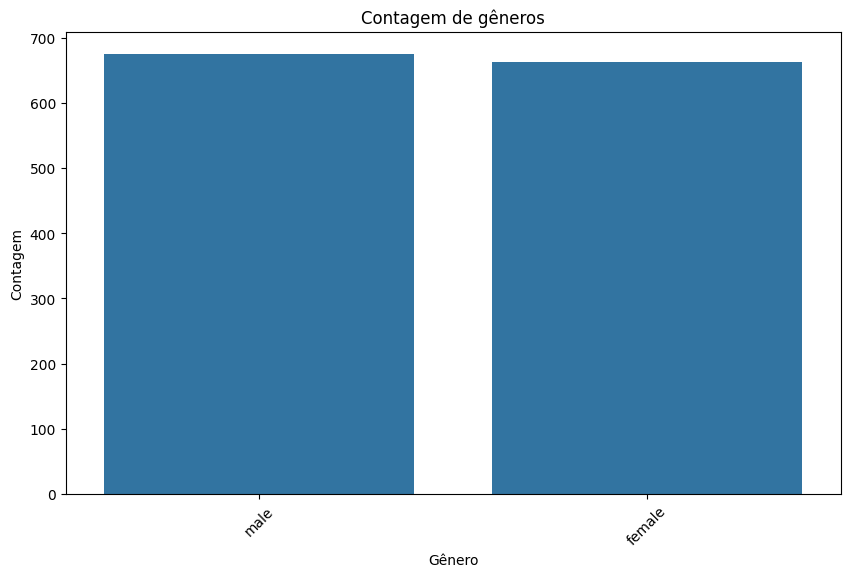

In [19]:
# 04.4 - Countplot do campo "sex":
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df_pacientes, order=df_pacientes['sex'].value_counts().index)
plt.title('Contagem de gêneros')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

## Sobre os gêneros - sex:

```
  Quantidade entre os dois gêrenos é quase igual.
```

#

<Axes: >

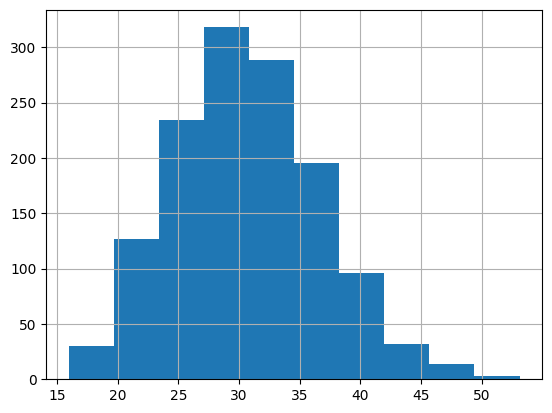

In [20]:
# 04.5 - Histograma do campo "bmi":
df_pacientes['bmi'].hist()

Text(0, 0.5, 'Densidade')

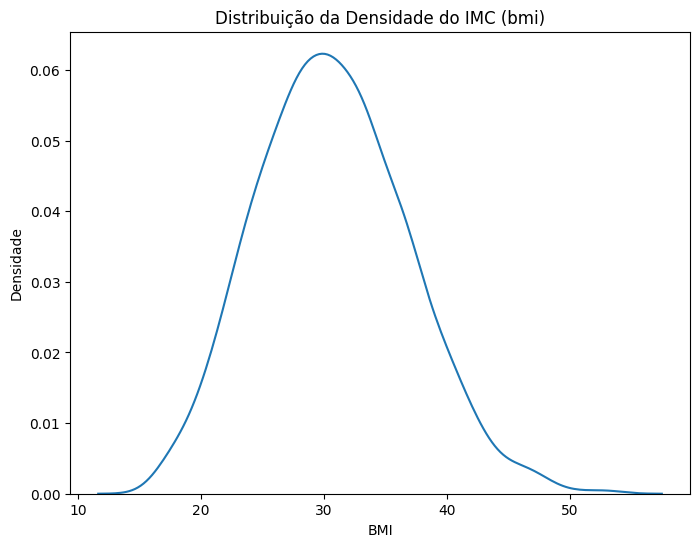

In [21]:
# 04.6 - Distribuição da densidade do campo "bmi":
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_pacientes, x='bmi')
plt.title('Distribuição da Densidade do IMC (bmi)')
plt.xlabel('BMI')
plt.ylabel('Densidade')

Text(0, 0.5, 'BMI')

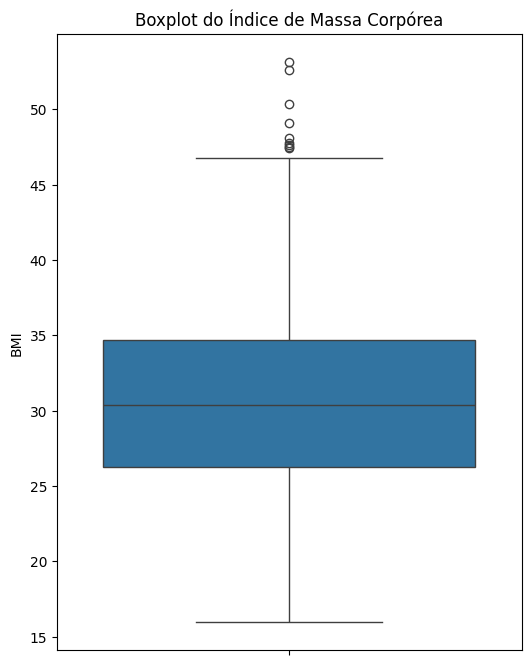

In [22]:
# 04.7 - Boxplot do campo "bmi":
plt.figure(figsize=(6, 8))
sns.boxplot(y=df_pacientes['bmi'])
plt.title('Boxplot do Índice de Massa Corpórea')
plt.ylabel('BMI')

## Sobre o BMI ou IMC:

```
  Mais de 300 registros tem BMI 30.
  O gráfico é quase Simétrico, distribuição quase normal.
  Com tudo, será aplicado o StandardScaler por terem 
valores altos e baixos que podem influenciar erroniamente
o modelo.
  Existem outliers superiores.
  Estes outiers são reais e não devem ser removidos.
  Será aplicado o StandardScaler.
```

#

<Axes: >

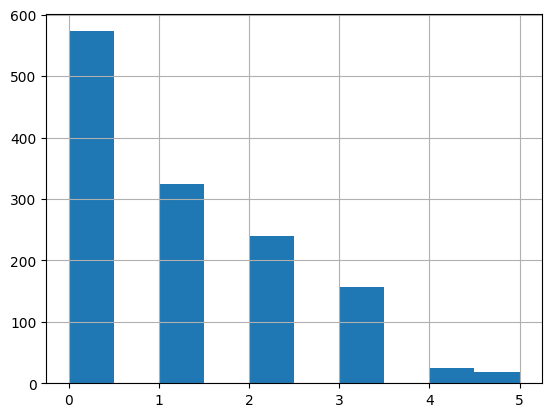

In [23]:
# 04.8 - Histograma do campo "Children":
df_pacientes['children'].hist()

Text(0, 0.5, 'Densidade')

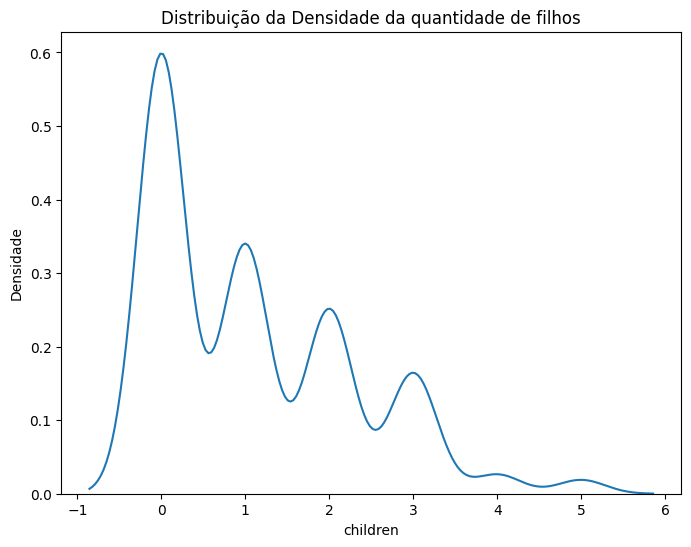

In [24]:
# 04.9 - Destribuição da densidade de filhos, campo "Children":
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_pacientes, x='children')
plt.title('Distribuição da Densidade da quantidade de filhos')
plt.xlabel('children')
plt.ylabel('Densidade')

Text(0, 0.5, 'Children')

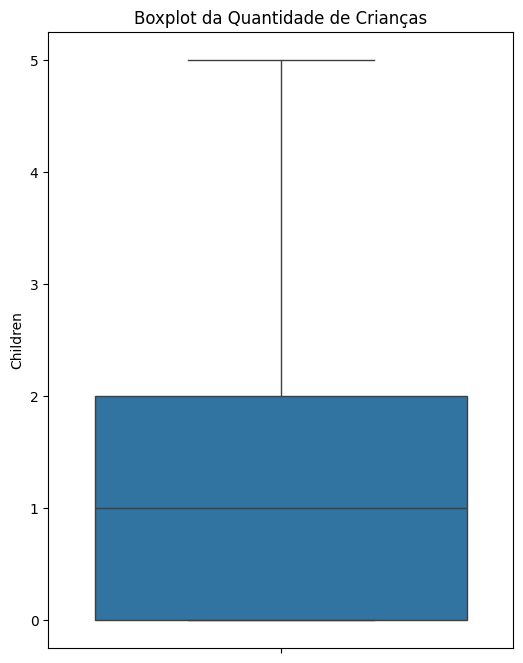

In [25]:
# 04.10 - Boxplot da quantidade de filhos, campo "Children":
plt.figure(figsize=(6, 8))
sns.boxplot(y=df_pacientes['children'])
plt.title('Boxplot da Quantidade de Crianças')
plt.ylabel('Children')

## Sobre a quantidade de filhos:

```
  Assimétrico: os dados não estão uniformemente distribuídos.
  Será aplicado o StandardScaler.
```

#

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

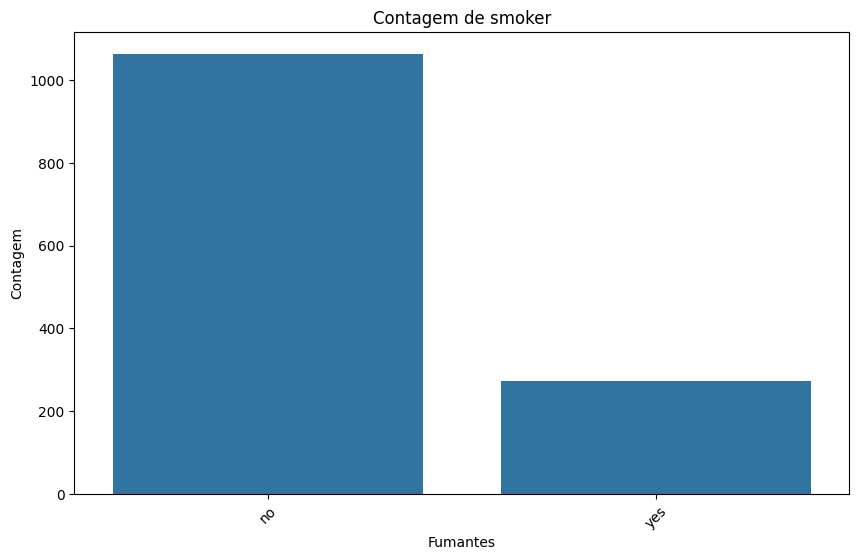

In [26]:
# 04.11 - Countplot do campo "smoker":
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data=df_pacientes, order=df_pacientes['smoker'].value_counts().index)
plt.title('Contagem de smoker')
plt.xlabel('Fumantes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

## Sobre o campo smoker:

```
  Os dados são muito distantes: fumantes e nao fumantes;
isso em quantidades de um e outro.
  Novamente, como a prática mais moderna e segura para o pré-processamento 
do modelo é usar OneHotEncoder, incluindo colunas com apenas dois valores, será utiliado o
OneHotEncoder com este campo.
```

#

([0, 1, 2, 3],
 [Text(0, 0, 'southeast'),
  Text(1, 0, 'southwest'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast')])

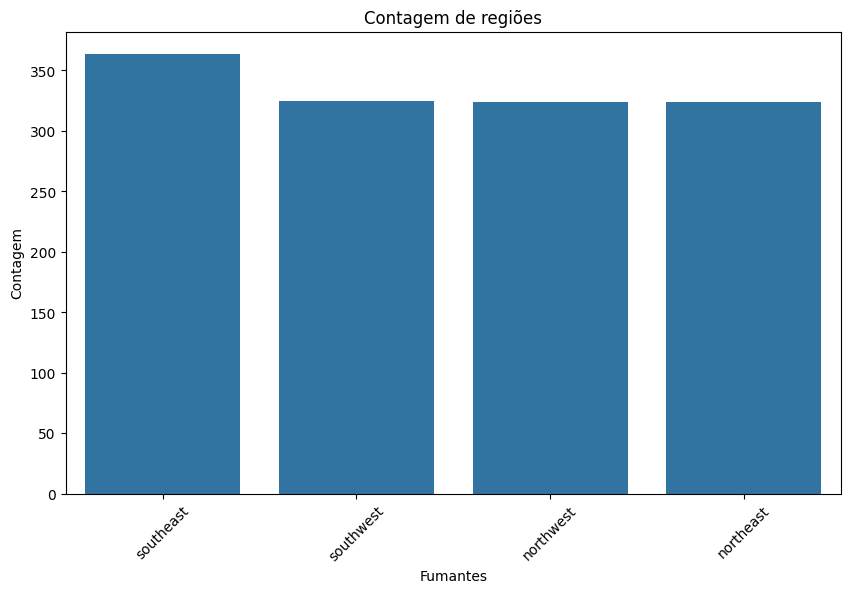

In [27]:
# 04.12 - Countplot do campo "region"
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df_pacientes, order=df_pacientes['region'].value_counts().index)
plt.title('Contagem de regiões')
plt.xlabel('Fumantes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

## Sobre o campo region:
```
  Os dados estão bem parecidos em termos das quantidade.
  Aqui será aplicaco um OneHotEncoder.
```

#

<Axes: >

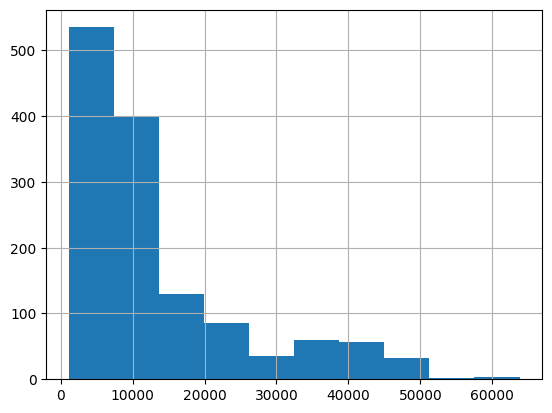

In [28]:
# 04.13 - Histograma dos custos hospitalares, campo "charges"
df_pacientes['charges'].hist()

Text(0, 0.5, 'Densidade')

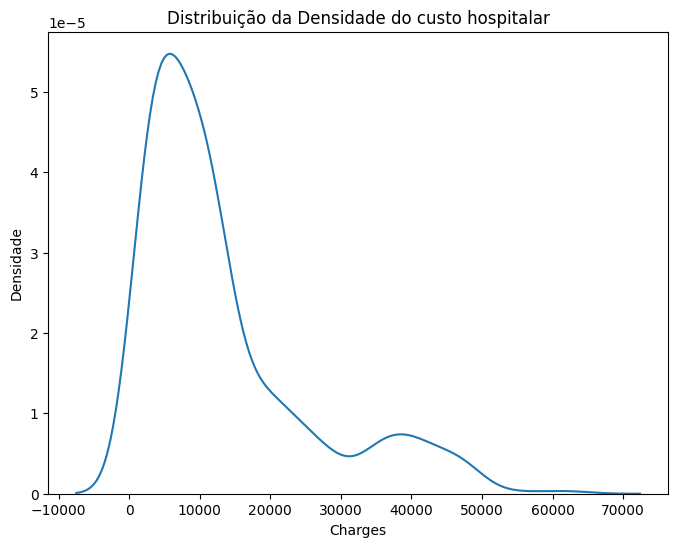

In [29]:
# 04.14 - Destribuição da densidade do custo hospitalar, campo "charges"
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_pacientes, x='charges')
plt.title('Distribuição da Densidade do custo hospitalar')
plt.xlabel('Charges')
plt.ylabel('Densidade')

Text(0, 0.5, 'Charges')

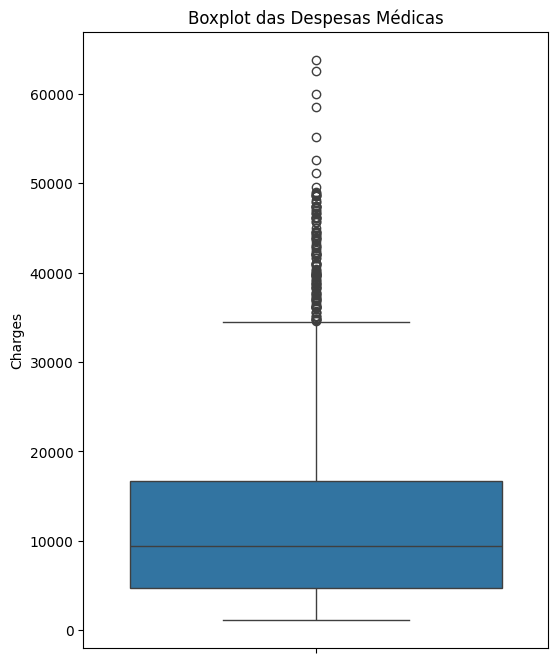

In [30]:
# 04.15 - Boxplot do campo "charges"
plt.figure(figsize=(6, 8))
sns.boxplot(y=df_pacientes['charges'])
plt.title('Boxplot das Despesas Médicas')
plt.ylabel('Charges')

##  Sobre o charges, os custos médicos individuais:

```
  A feature "chares" é o (alvo) da predição (o target).
  Porém é assimétrico: os dados não estão uniformemente distribuídos.
  Muitos outliers superiores, mas, reais; e por isso não serão removidos.
  Será aplicado um cálculo logarítimo na coluna charges para evitar vícios
no modelo. 
  A função np.log1p do NumPy é ideal porque ela lida bem com 
valores de zero (calcula log(1+x)).
```

#

In [31]:
# 05 ===[ Padronizando e Normalizando ]==================================
df_log = df_pacientes.copy() # copiando a base principal
df_log['charges'] = np.log1p(df_log['charges']) # normalizando charges com log1p.

X = df_log.drop('charges', axis=1) # X contém todas as colunas, exceto o alvo
y = df_log['charges'] # y contém apenas o alvo

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantém as colunas não especificadas (se houver)
)

arr_nupy_transformed = preprocessor.fit_transform(X)
arr_nupy_new_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
arr_nupy_all_column_names = numeric_features + list(arr_nupy_new_categorical_columns)

df_transformed = pd.DataFrame(arr_nupy_transformed, columns=arr_nupy_all_column_names)
df_transformed['charges'] = y.values

```
  Agora temos um dataframe transformado e pronto para a continuação
da análise.
```

In [32]:
# 05.1 - Visualizando as cinco primeiros registros do datagrame já transformado:
df_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,-1.440418,-0.453160,-0.909234,0.0,1.0,0.0,0.0,1.0,9.734236
1,-1.511647,0.509422,-0.079442,1.0,0.0,0.0,1.0,0.0,7.453882
2,-0.799350,0.383155,1.580143,1.0,0.0,0.0,1.0,0.0,8.400763
3,-0.443201,-1.305052,-0.909234,1.0,0.0,1.0,0.0,0.0,9.998137
4,-0.514431,-0.292456,-0.909234,1.0,0.0,1.0,0.0,0.0,8.260455


In [33]:
# 05.2 - Exibindo a correlação:
df_transformed.corr()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.109344,0.041536,-0.019814,-0.025587,0.001495,-0.012311,0.009415,0.526900
bmi,0.109344,1.000000,0.012755,0.046397,0.003746,-0.136138,0.270057,-0.006211,0.132831
children,0.041536,0.012755,1.000000,0.017848,0.007331,0.026044,-0.023492,0.021538,0.160316
sex_male,-0.019814,0.046397,0.017848,1.000000,0.076596,-0.012482,0.017578,-0.003767,0.007022
smoker_yes,-0.025587,0.003746,0.007331,0.076596,1.000000,-0.036321,0.068282,-0.037168,0.665751
region_northwest,0.001495,-0.136138,0.026044,-0.012482,-0.036321,1.000000,-0.345909,-0.320493,-0.015431
region_southeast,-0.012311,0.270057,-0.023492,0.017578,0.068282,-0.345909,1.000000,-0.346614,0.014980
region_southwest,0.009415,-0.006211,0.021538,-0.003767,-0.037168,-0.320493,-0.346614,1.000000,-0.042474
charges,0.526900,0.132831,0.160316,0.007022,0.665751,-0.015431,0.014980,-0.042474,1.000000


Text(0.5, 1.0, 'Mapa de Correlação Após Pré-processamento Completo')

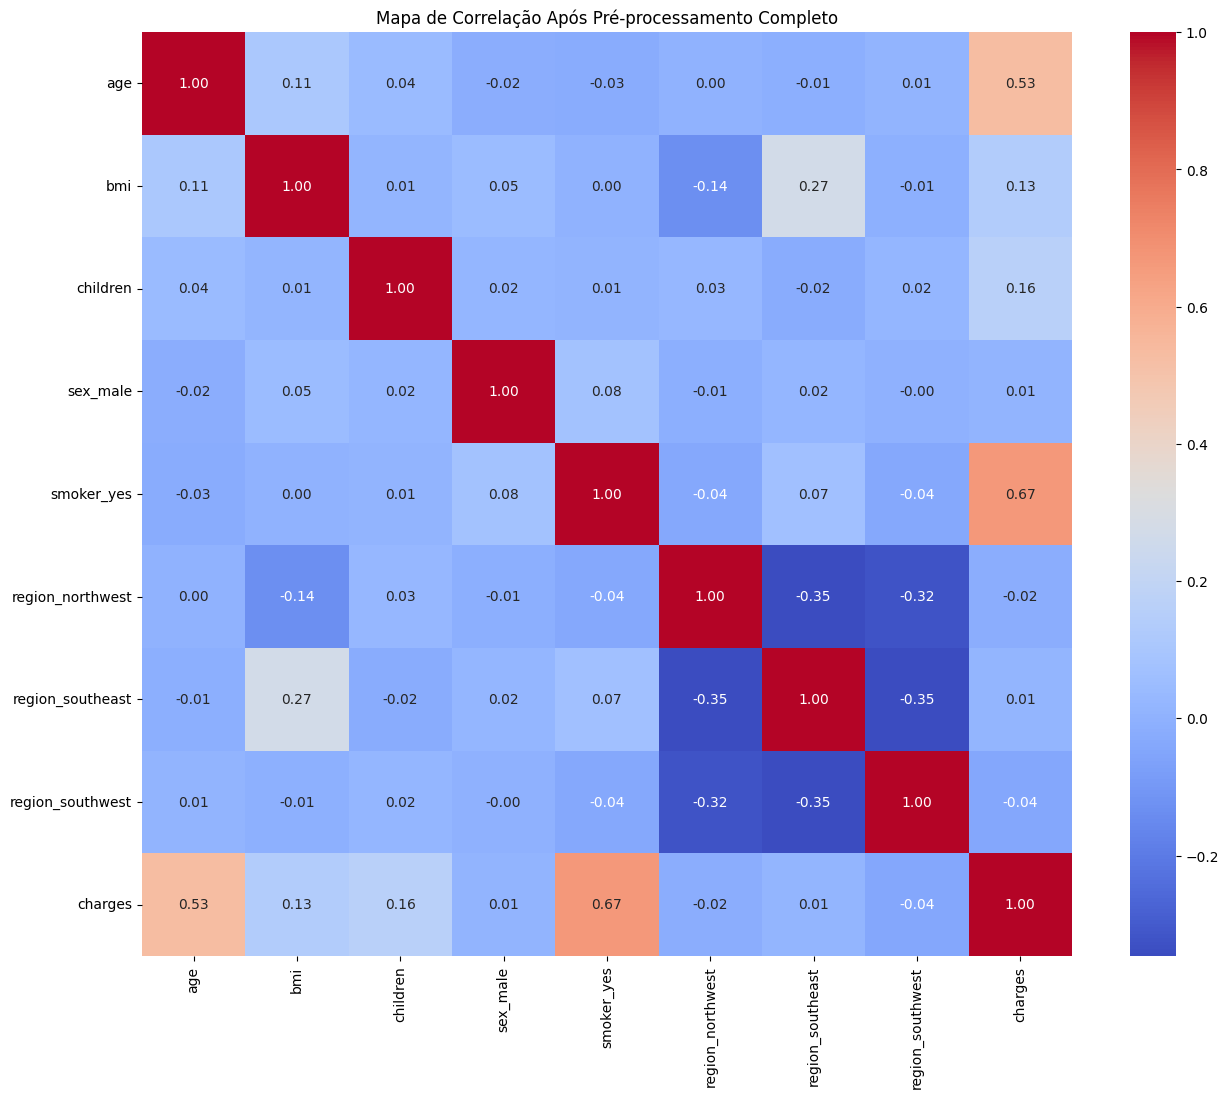

In [34]:
# 05.3 - Visualizado em um mapa de correlação:
correlation_matrix = df_transformed.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)
plt.title('Mapa de Correlação Após Pré-processamento Completo')

```
  Baixa correlação.
```

In [35]:
# 06 ===[ Criando o Pipeline Principal (único) ]===========================================
#   O primeiro passo é o pré-processador (que lida com todas as colunas), 
# criado anteriormente.
#   O segundo passo é o modelo de Regressão Linear.

# 06.1 - Importando a lib do regreção linear:
from sklearn.linear_model import LinearRegression

# 06.2 - Pipeline principal do modelo de regressão linear:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [36]:
# 07 ===[ Preparação dos Dados: Treino e Teste ]=================================================
# 07.1 - importando algumas lib necessárias:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

In [37]:
# 07.2 - Aplicando a transformação log. no alvo (como planejado!)
# diretamente no dataframe [df_pacientes].
df_pacientes['charges'] = np.log1p(df_pacientes['charges'])

In [38]:
# 07.3 - Separando features (X) e alvo (y)
X = df_pacientes.drop('charges', axis=1)
y = df_pacientes['charges']

In [39]:
# 07.4 - Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#

```
  Vou testar um modelo de regressão linear.
```

#

In [40]:
# 08 ===[ Treinamento e Predição ]=========================
# Treinar o pipeline inteiro com uma única linha!
# Será aplicado todos os passos de pré-processamento e treinar o modelo.
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [41]:
# 08.1 - Fazer previsões com uma única linha!
# Ele irá aplicar as transformações nos dados de teste e fazer a predição.
log_predictions = model_pipeline.predict(X_test)

In [42]:
# 08.2 - Reverter a transformação log para obter os valores reais
real_predictions = np.expm1(log_predictions)

In [43]:
# 08.3 - Revertendo o y_test também para comparar
y_test_real = np.expm1(y_test)

In [44]:
# 09 ===[ Avaliação ]==========================================================
rmse = np.sqrt(mean_squared_error(y_test_real, real_predictions))
print(f"O RMSE do modelo no conjunto de teste é: ${rmse:.2f}")

O RMSE do modelo no conjunto de teste é: $7197.03


In [45]:
# 09.1 - Calculando o R² Score
# A ordem dos argumentos é a mesma: (valores verdadeiros, valores previstos)
r2 = r2_score(y_test_real, real_predictions)
print(f"O R² Score do modelo é: {r2:.4f} (ou {r2:.2%})") # Imprime como decimal e porcentagem

O R² Score do modelo é: 0.7181 (ou 71.81%)


# Analisando o Resultado

```
  Apesar do RMSE mostrar um erro em dolar, ele é relativo aos valores totais,
então, o R2 mostrou um acerto de apenas 71.81%.
  Como imaginado anteriormente, a baixa relação deixou esse modelo ineficaz.
  Logo, um novo modelo deve ser testado como próxmo passo nesta análise.
  Será utilizado a RandomForestRegressor por ser mais robusto aos outliers e
não depender tando da correlação.
  Com tudo, ainda será feita uma análise com a lib Statmodels para identifcar mais
detalhes do modelo de regressão linear treinado.
```

#

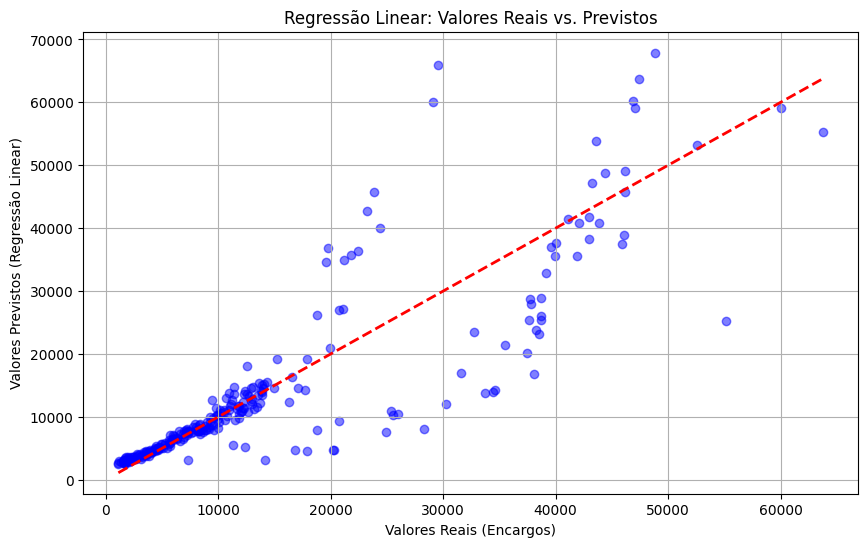

In [46]:
# 10 ===[ Gráfico: Previsões vs. Valores Reais (Regressão Linear) ]===
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, real_predictions, alpha=0.5, color='blue')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], '--r', lw=2) # Linha diagonal de referência
plt.xlabel("Valores Reais (Encargos)")
plt.ylabel("Valores Previstos (Regressão Linear)")
plt.title("Regressão Linear: Valores Reais vs. Previstos")
plt.grid(True)
plt.show()

In [47]:
# 11 ===[ Validação Estatística com Statsmodels (Regressão Linear) ]===
import statsmodels.api as sm

# 11.1 - Pré-processar os dados de TREINO usando o 'preprocessor' do pipeline
#    O 'preprocessor' já foi ajustado (fit) aos dados de treino
#    quando treinou o model_pipeline.
#    ColumnTransformer se chama 'preprocessor':
X_train_processed = preprocessor.transform(X_train)

# 11.2 - Obter os nomes das features após o pré-processamento
#    Isso ajudará a interpretar o sumário do statsmodels.
try:
    # Acessando o OneHotEncoder dentro do ColumnTransformer e da Pipeline do transformador categórico
    ohe_categories = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    processed_feature_names = numeric_features + list(ohe_categories)
except AttributeError:
    # Fallback se a estrutura de nomes for diferente (ex: se não houver pipeline no transformador)
    print("Aviso: Não foi possível obter os nomes das features processadas automaticamente. O sumário usará nomes genéricos se não forem fornecidos como DataFrame.")
    processed_feature_names = None


# 11.3 - Converter para DataFrame para usar os nomes das colunas com statsmodels, melhorando o sumário)
if processed_feature_names:
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)
else:
    X_train_processed_df = pd.DataFrame(X_train_processed, index=X_train.index)


# 11.4 - Adicionar uma constante (intercepto) ao modelo
X_train_sm = sm.add_constant(X_train_processed_df)

# 11.5 - Criar e treinar o modelo OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# 11.6 - Exibir o sumário estatístico do modelo
print("\n=== Sumário Estatístico do Modelo de Regressão Linear (statsmodels) ===")
print(model_sm.summary())


=== Sumário Estatístico do Modelo de Regressão Linear (statsmodels) ===
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     396.8
Date:                Sun, 01 Jun 2025   Prob (F-statistic):          1.79e-312
Time:                        14:09:10   Log-Likelihood:                -671.52
No. Observations:                1069   AIC:                             1361.
Df Residuals:                    1060   BIC:                             1406.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

# Statmodels


```
  Em [coef] (coeficiente), podemos observar que a idade [age] e ser fumante [smoker_yes]
são as colunas que mais impactam no modelo, as que tem influência no alvo [charges] 
(custos hospitalares).
  Na questão da significância estatística de cada coeficiente, segundo a regra geral de
que P>|t| < 0.05, a variável é considerada estatisticamente significativa, temos que
apenas a coluna [region_northwest] não é significante.
  No Intervalo de Confiança, representado por [0.025      0.975], region_northwest
contém zero no seu intervalo: -0.122       0.035; reforçando a conclusão de que 
essa coluna não é estatisticamente significativa neste modelo.
  Apesar do modelo estar estatisticamente robusto, estava havendo muito erros que puderam
ser vistos no gráfico das variáveis reais vs as preditas.
```

#

## Usando RandomForestRegressor
---

In [48]:
# 12 ===[ Importações de libs Necessárias ]=========================================
from sklearn.ensemble import RandomForestRegressor

In [49]:
# 13 ===[ Redifiniçao do Pipeline Principal ]=======================================
# O primeiro passo é o pré-processador (que lida com todas as colunas)
# O segundo passo é o modelo de Regressão RandomForestRegressor.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [50]:
# 14 ===[ Treinamento e Predição ]==================================================
# Treinar o pipeline inteiro com uma única linha!
# Aplicar todos os passos de pré-processamento e treinar o modelo.
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [51]:
# 14.1 - Fazer previsões com uma única linha!
# Ele irá aplicar as transformações nos dados de teste e fazer a predição.
log_predictions = model_pipeline.predict(X_test)

In [52]:
# 14.2 - Reverter a transformação log. para obter os valores reais
real_predictions = np.expm1(log_predictions)

In [53]:
# 14.3 - Revertendo o y_test também para comparar
y_test_real = np.expm1(y_test)

In [54]:
# 15 ===[ Avaliação ]========================================================
rmse = np.sqrt(mean_squared_error(y_test_real, real_predictions))
print(f"O RMSE do modelo no conjunto de teste é: ${rmse:.2f}")

O RMSE do modelo no conjunto de teste é: $4405.06


###  Houve uma diminuiçao aqui no erro em dolar.
#

In [55]:
# 15.1 - Calculando o R² Score
# A ordem dos argumentos é a mesma: (valores verdadeiros, valores previstos)
r2 = r2_score(y_test_real, real_predictions)
print(f"O R² Score do modelo é: {r2:.4f} (ou {r2:.2%})") # Imprime como decimal e porcentagem

O R² Score do modelo é: 0.8944 (ou 89.44%)


### Agora um R2 com 89.44% de acerto, o RandomForestRegressor fica sendo definindo assim como melhor que a regressão linear. 

#

In [56]:
# 16 ===[ Verificando a Importância das Features ]===============================
# Acessando os nomes das features após o pré-processamento
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
# Acessando as importâncias do modelo treinado
importances = model_pipeline.named_steps['regressor'].feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nImportância das Features segundo o modelo:")
print(feature_importance_df)


Importância das Features segundo o modelo:
            Feature  Importance
4        smoker_yes    0.428695
0               age    0.379399
1               bmi    0.106999
2          children    0.048781
3          sex_male    0.012403
5  region_northwest    0.009095
6  region_southeast    0.008382
7  region_southwest    0.006246


###  O fato de ser fumante, somanda a idade, são os fatores que mais influenciam nos custos hispitalares.

#

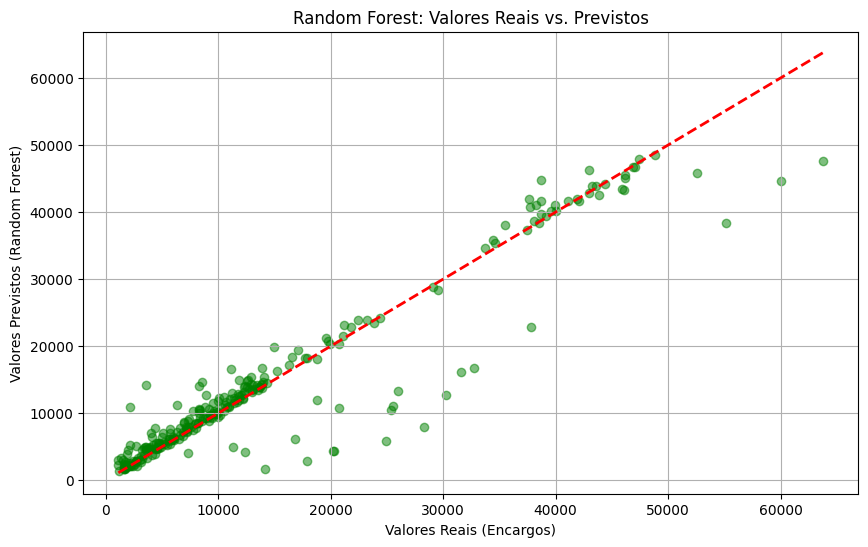

In [57]:
# 17 ===[ Gráfico: Previsões vs. Valores Reais (Random Forest) ]===
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, real_predictions, alpha=0.5, color='green')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], '--r', lw=2) # Linha diagonal de referência
plt.xlabel("Valores Reais (Encargos)")
plt.ylabel("Valores Previstos (Random Forest)")
plt.title("Random Forest: Valores Reais vs. Previstos")
plt.grid(True)
plt.show()

#

# Conclusão Geral

#### O objetivo do projeto
```
  A princípio era criar um modelo preditivo e comprovar sua eficácia com métricas estatísticas,
mas, faltava um alvo e uma correlação que se mostraram na fase de análise dos dados, onde
o alvo escolhido foram os custos hospitalares.
```
#
#### Os principais passos realizados
```
1. Conhecer os Dados
2. Padronização dos dados
3. Verificar a correlação
   a. Mapa de Correlação (heatmap)
4. Um pipeline principal
5. Estatística com Statsmodels (Regressão Linear)
6. Comparativo do RMSE e R2 Score
7. Gráficos das Previsões vs Valores Reais
```

#
#### O modelo de melhor desempenho
```
  Definitivamente o Random Forest Regressor apresentou melhores resultados
tanto nos gráficos das previsões vs valores reais, quanto no comparativo das
estatísticas métricas RMSE e R2 Score.
  Se houvesse uma correlação melhor talvez o resultado fosse diferente.
```

#
#### Os principais insights 
```
  As features mais importantes no modelo são:
  
--> smoker_yes    0.428695
-->        age    0.379399
-->        bmi    0.106999

```

#
#### Limitações do Estudo

* Base de dados pequena.
* Uso de somente dois modelos de regressão.
* Não alteração dos valores padrões dos hiperparâmetros.

#
#### Sugestão para o Futuro

* Implementação de uma API.
* Construção de uma interface gráfica.
  
